# Findings and Observations for Loan Application Data
1) Needed to create a model which would predict if the customer can get the loan or not
2) Data had a lot of Null values which was fixed by mean and mode method
3) There were numerical columns and categorical columns which were required to be split due to the analysis
4) By using the distplot and boxplot we identified that there was lot of skewness in Numerical columns
5) Skewness was reduced by using the Cuberoot method
6) Then we converted the text columns into numbers by using the OrdinalEncoder logic
7) Correlation with target Loan_Staus was positive for a few columns but not too biased so did not delete any columns
8) Multicollinearity was not that high too so did not drop any columns
9) The best model selected from the f1 score and cross validation was RandomForest Classifier model and the outcome after HyperParameter Tuning was 96%
10) Overall the data had lot of updates and findings to be done and the features were contributing to the the outcome across apart from LoanID due to which we set it up as index

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
#checking the dimension of the dataset
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#checking the columns of dataset
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
#checking thev types of column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Fill the null values

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [10]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Fill the null values

df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [12]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#Fill the null values

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [16]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [17]:
#checking the null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

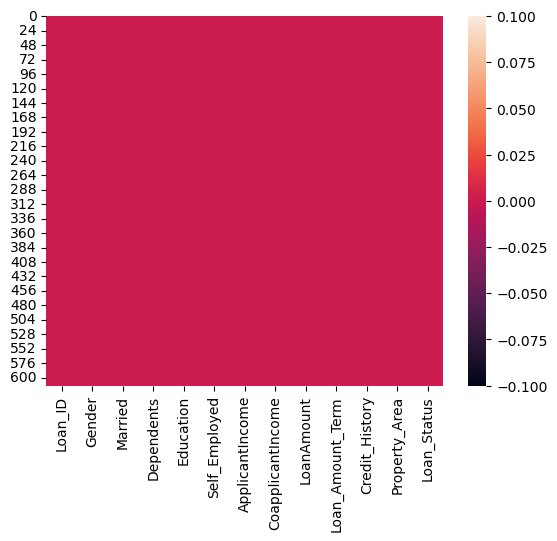

In [19]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [20]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


Gender
Male      502
Female    112
Name: count, dtype: int64


Married
Yes    401
No     213
Name: count, dtype: int64


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     532
Yes     82
Name: count, dtype: int64


ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000   

In [21]:
#Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [22]:
#Checking number of unique values in each column
df.nunique().to_frame('No. of unique values')

,No. of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11


In [24]:
#Statistical summary of new columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


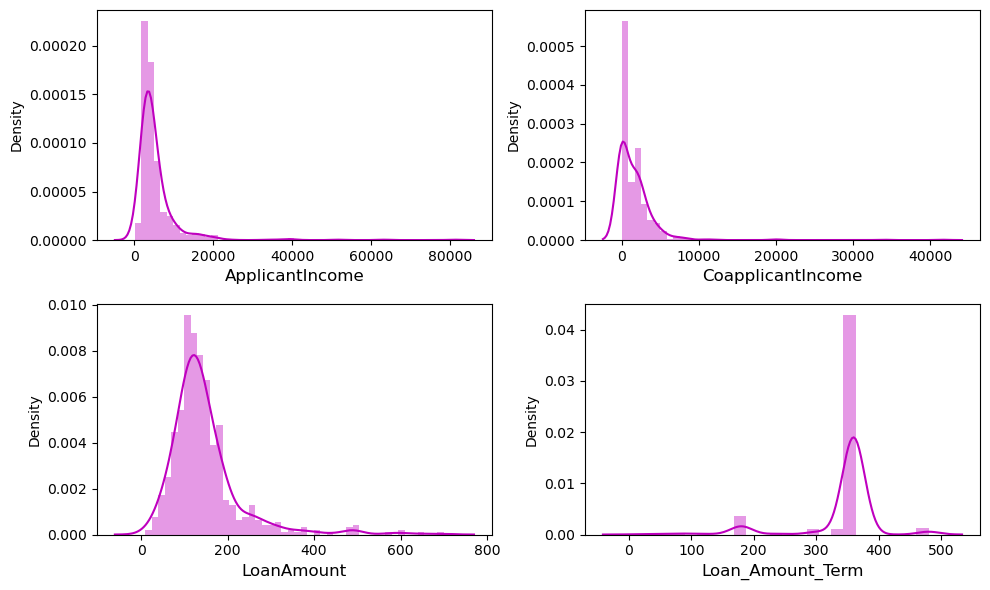

In [25]:
#Lets check how the data has been distributed in remaining column
plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color = 'm')
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

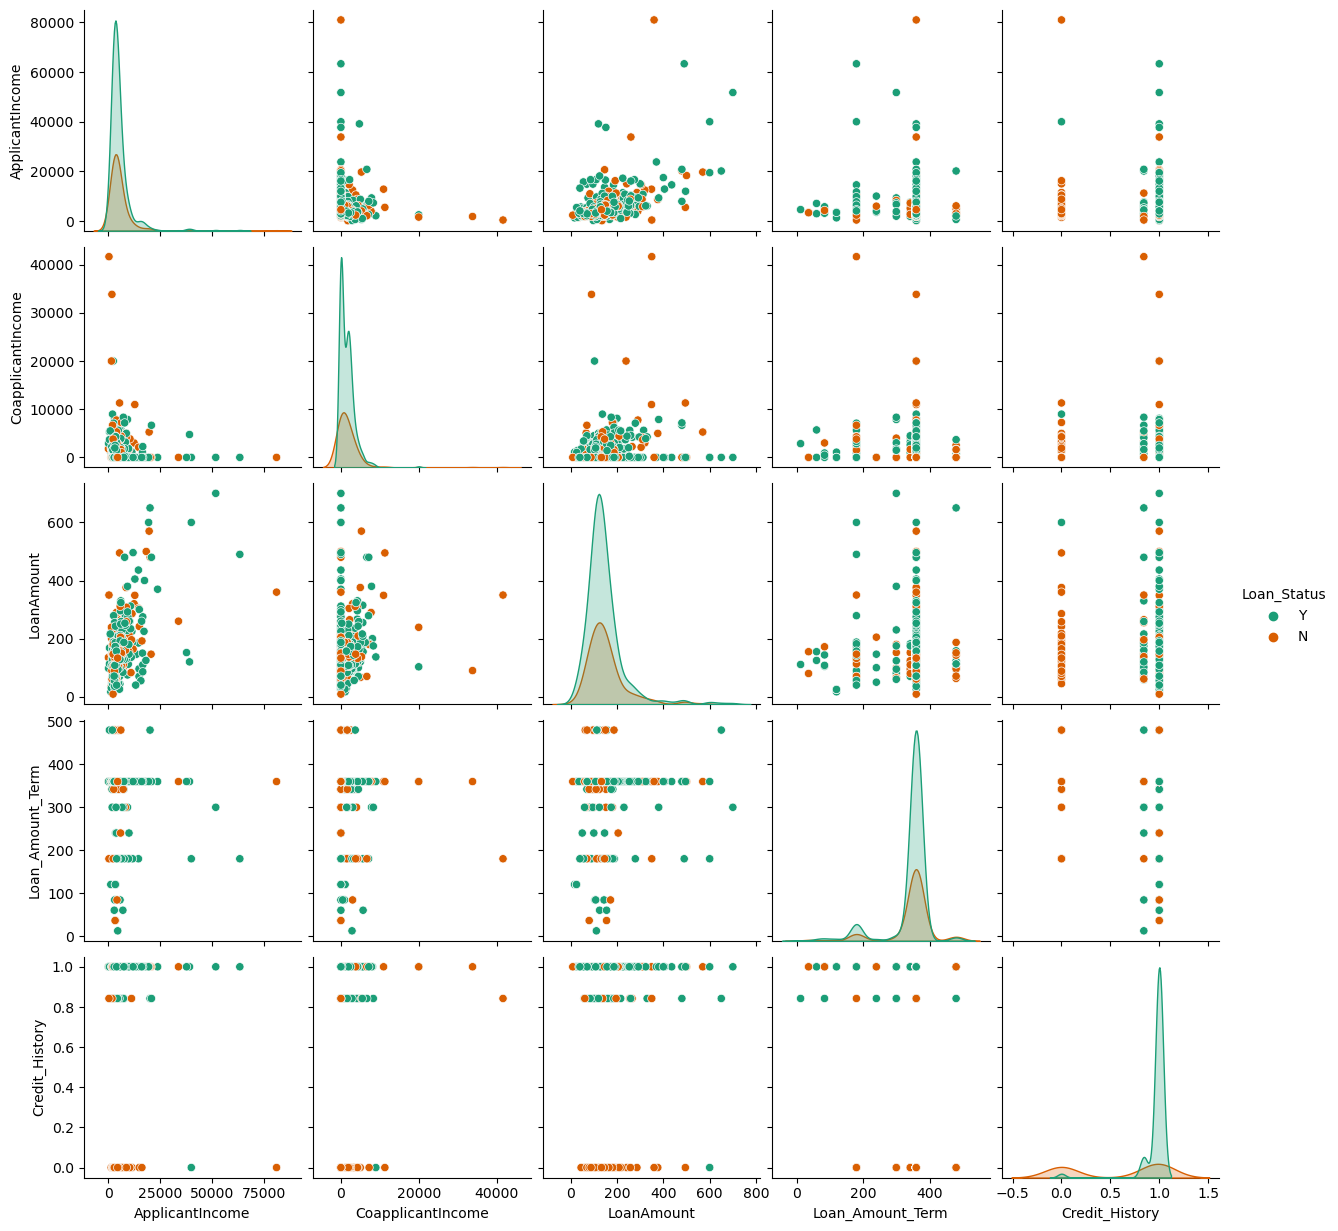

In [27]:
sns.pairplot(df, hue = 'Loan_Status', palette = 'Dark2')
plt.show()

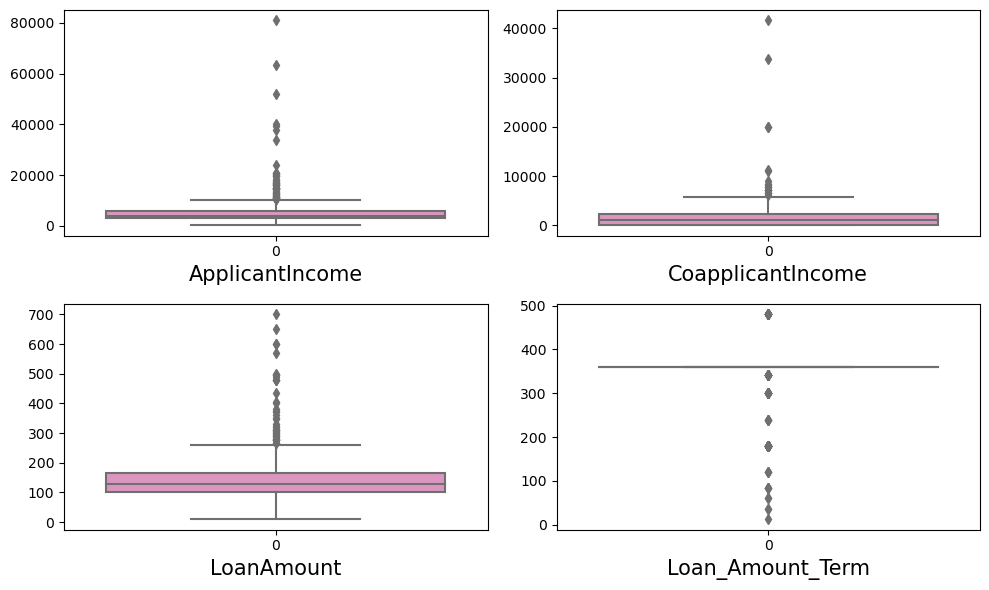

In [28]:
#Lets check the Outliers by plotting boxplot

plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [29]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
dtype: float64

In [30]:
#Removing Skewness using Cuberoot method
df['CoapplicantIncome'] = np.cbrt(df['CoapplicantIncome'])

df['ApplicantIncome'] = np.cbrt(df['ApplicantIncome'])

df['LoanAmount'] = np.cbrt(df['LoanAmount'])

In [31]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -2.389680
dtype: float64

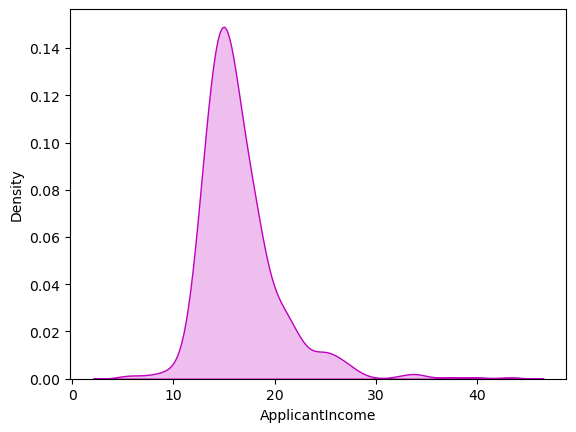

In [32]:
#Lets visuaize how the data has been distributed in ApplicantIncome after removing the skewness
sns.distplot(df['ApplicantIncome'], color = 'm', kde_kws = {"shade":True}, hist=False)
plt.show()

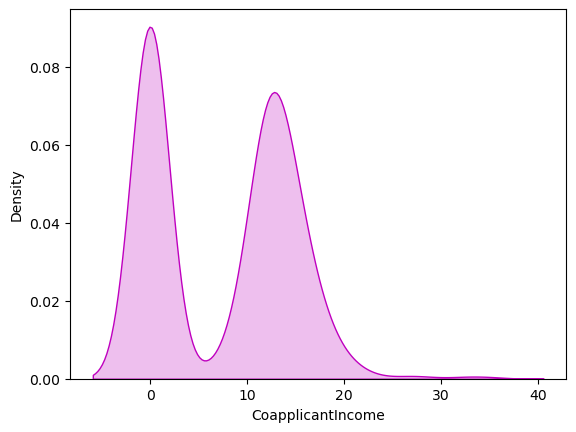

In [33]:
#Lets visuaize how the data has been distributed in ApplicantIncome after removing the skewness
sns.distplot(df['CoapplicantIncome'], color = 'm', kde_kws = {"shade":True}, hist=False)
plt.show()

In [34]:
#Setting Loan_ID as DataFrame index
df.set_index('Loan_ID', inplace=True)

In [35]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,18.017473,0.000000,5.270588,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,16.610522,11.467457,5.039684,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,14.422496,0.000000,4.041240,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,13.720654,13.310098,4.932424,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,18.171206,0.000000,5.204828,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,14.260431,0.000000,4.140818,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,16.013010,0.000000,3.419952,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,20.059821,6.214465,6.324704,360.0,1.0,Urban,Y


In [36]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1.0,0.0,0.0,0.0,0.0,18.017473,0.000000,5.270588,360.0,1.0,2.0,1.0
LP001003,1.0,1.0,1.0,0.0,0.0,16.610522,11.467457,5.039684,360.0,1.0,0.0,0.0
LP001005,1.0,1.0,0.0,0.0,1.0,14.422496,0.000000,4.041240,360.0,1.0,2.0,1.0
LP001006,1.0,1.0,0.0,1.0,0.0,13.720654,13.310098,4.932424,360.0,1.0,2.0,1.0
LP001008,1.0,0.0,0.0,0.0,0.0,18.171206,0.000000,5.204828,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0.0,0.0,0.0,0.0,14.260431,0.000000,4.140818,360.0,1.0,0.0,1.0
LP002979,1.0,1.0,3.0,0.0,0.0,16.013010,0.000000,3.419952,180.0,1.0,0.0,1.0
LP002983,1.0,1.0,1.0,0.0,0.0,20.059821,6.214465,6.324704,360.0,1.0,2.0,1.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 62.4+ KB


In [38]:
#Stastical summary of numerical
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,16.520506,7.480926,5.125758,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,3.939230,7.108669,0.855009,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.313293,0.000000,2.080084,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,14.223454,0.000000,4.645444,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,15.621999,10.592145,5.052774,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,17.961849,13.194779,5.482031,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,43.267487,34.668156,8.879040,480.000000,1.000000,2.000000,1.000000


In [39]:
#Checking the correlation between features and the target
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.075111,0.208217,0.135750,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.034547,0.280112,0.174273,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.122477,-0.004252,0.163877,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.181428,0.010615,-0.158991,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.188492,-0.074737,0.115086,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.075111,0.034547,0.122477,-0.181428,0.188492,1.000000,-0.325066,0.555728,-0.034608,0.015212,-0.024827,0.004341
CoapplicantIncome,0.208217,0.280112,-0.004252,0.010615,-0.074737,-0.325066,1.000000,0.158113,-0.003778,-0.003044,-0.052318,0.033582
LoanAmount,0.135750,0.174273,0.163877,-0.158991,0.115086,0.555728,0.158113,1.000000,0.068902,-0.017384,-0.077644,-0.042714
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.034608,-0.003778,0.068902,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,0.015212,-0.003044,-0.017384,0.001395,1.000000,-0.001880,0.540483


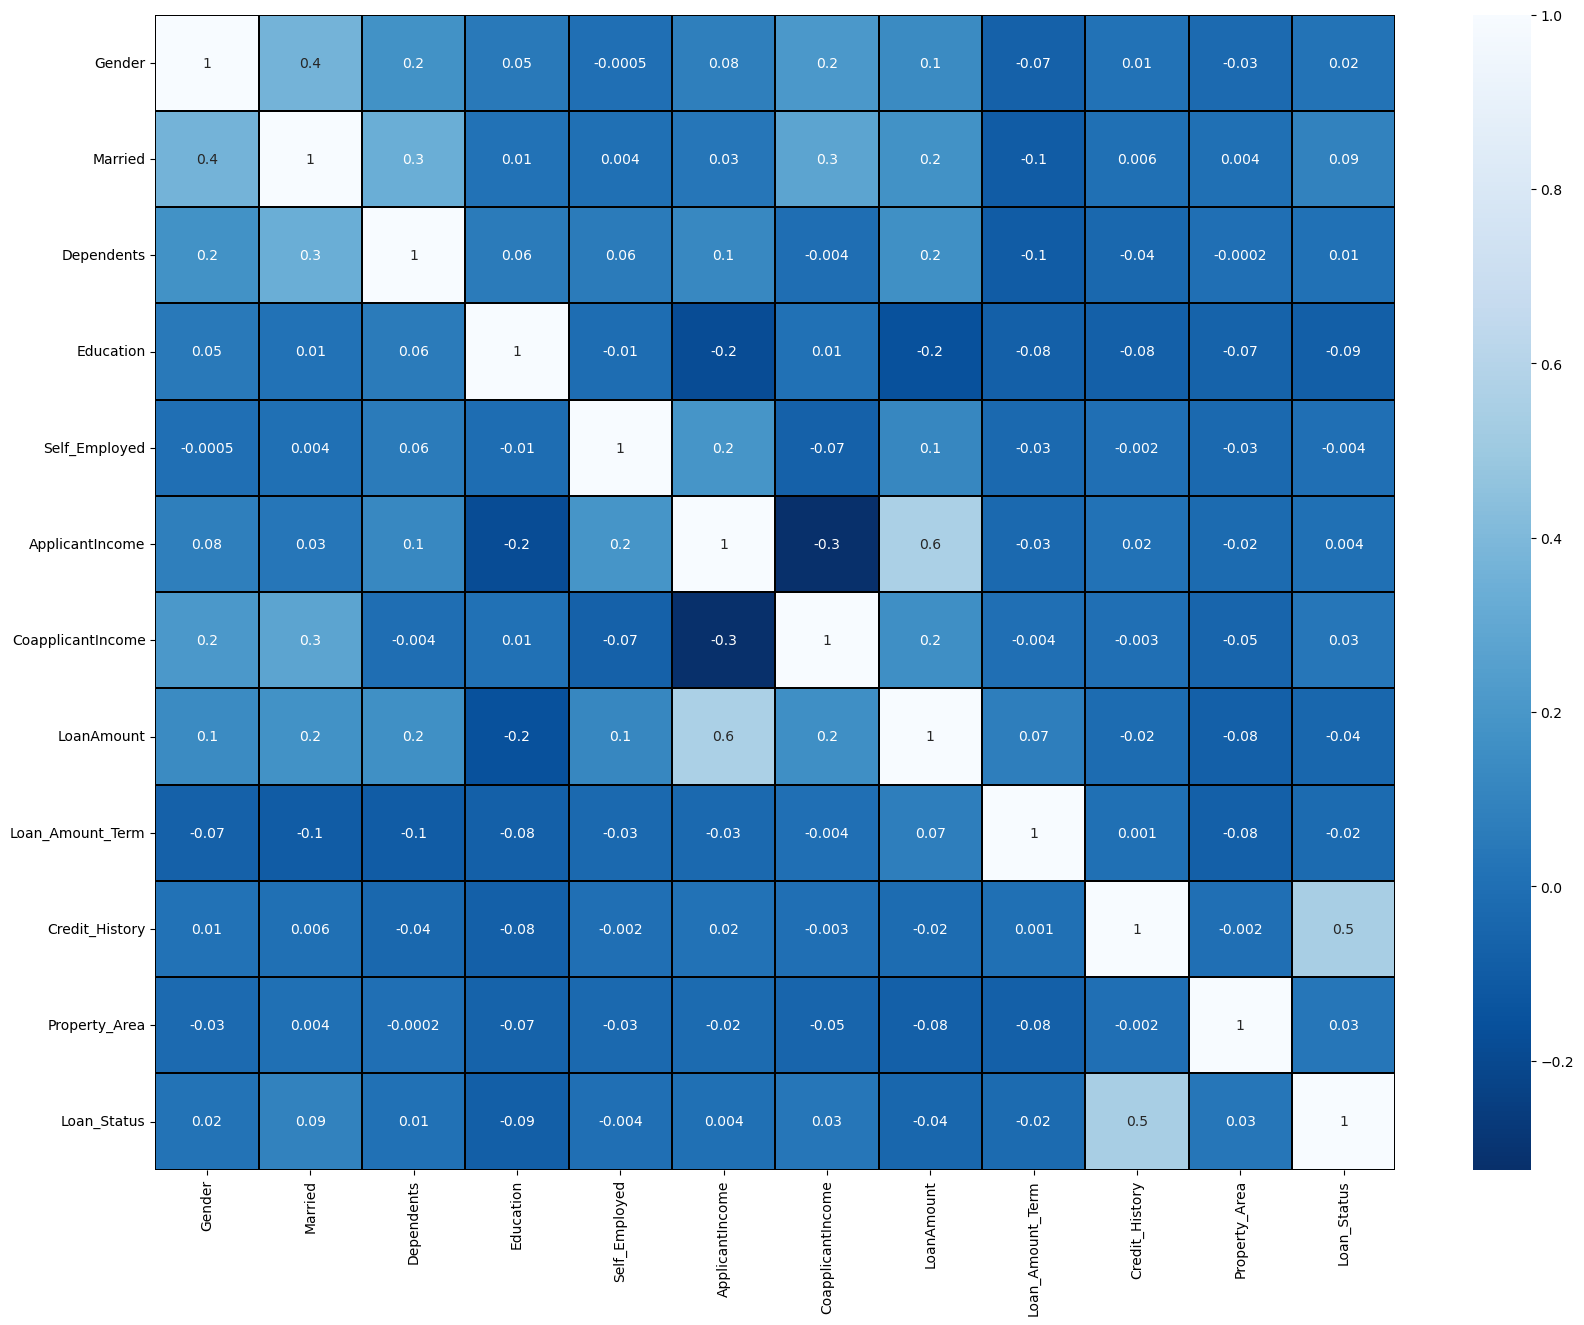

In [40]:
#Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [41]:
cor['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
CoapplicantIncome    0.033582
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
ApplicantIncome      0.004341
Self_Employed       -0.003700
Loan_Amount_Term    -0.020974
LoanAmount          -0.042714
Education           -0.085884
Name: Loan_Status, dtype: float64

In [42]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [43]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.380325,-1.053225,0.169528,0.279851,0.451640,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.022870,0.561256,-0.100752,0.279851,0.451640,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.533028,-1.053225,-1.269462,0.279851,0.451640,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.711341,0.820678,-0.226303,0.279851,0.451640,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.419383,-1.053225,0.092554,0.279851,0.451640,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.574203,-1.053225,-1.152903,0.279851,0.451640,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.128936,-1.053225,-1.996700,-2.518655,0.451640,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.899211,-0.178302,1.403404,0.279851,0.451640,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.794146,-1.053225,0.693799,0.279851,0.451640,1.223298


In [44]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [45]:
vif

,VIF values,Features
0,1.197693,Gender
1,1.360544,Married
2,1.178664,Dependents
3,1.071441,Education
4,1.041136,Self_Employed
5,2.045398,ApplicantIncome
6,1.528698,CoapplicantIncome
7,1.849418,LoanAmount
8,1.049646,Loan_Amount_Term
9,1.009428,Credit_History


In [46]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.9666666666666667 at random_state 11


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=maxRS)

In [49]:
#Classification Algorithms
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [50]:
#Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9
[[11  1]
 [ 2 16]]
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        12
         1.0       0.94      0.89      0.91        18

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [51]:
#Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.9666666666666667
[[11  1]
 [ 0 18]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [52]:
#Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9666666666666667
[[11  1]
 [ 0 18]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [53]:
#Check accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predGB))

0.9666666666666667
[[11  1]
 [ 0 18]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        12
         1.0       0.94      0.94      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [54]:
#Check accuracy for AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada.fit(x_train,y_train)
predada = Ada.predict(x_test)
print(accuracy_score(y_test, predada))
print(confusion_matrix(y_test, predada))
print(classification_report(y_test, predada))

0.9333333333333333
[[11  1]
 [ 1 17]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        12
         1.0       0.94      0.94      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [55]:
#Check accuracy for ExtraTreesClassifier
Etc = ExtraTreesClassifier()
Etc.fit(x_train,y_train)
predetc = Etc.predict(x_test)
print(accuracy_score(y_test, predetc))
print(confusion_matrix(y_test, predetc))
print(classification_report(y_test, predetc))

0.9666666666666667
[[11  1]
 [ 0 18]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [56]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score

In [57]:
#Checking cv score for Random Forest Classifier
score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predRFC) - score.mean())

[0.78861789 0.76422764 0.7804878  0.81300813 0.81147541]
0.7915633746501399
Difference between Accuracy score and Cross Validation score is - 0.1084366253498601


In [58]:
#Checking cv score for Logistic Regression Classifier
score1 = cross_val_score(LR, x, y)
print(score1)
print(score1.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predLR) - score1.mean())

[0.81300813 0.77235772 0.7804878  0.86178862 0.81967213]
0.8094628815140611
Difference between Accuracy score and Cross Validation score is - 0.15720378515260558


In [59]:
#Checking cv score for Support Vector Machine
score2 = cross_val_score(svc, x, y)
print(score2)
print(score2.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predsvc) - score2.mean())

[0.81300813 0.7804878  0.7804878  0.84552846 0.81147541]
0.8061975209916034
Difference between Accuracy score and Cross Validation score is - 0.16046914567506332


In [60]:
#Checking cv score for Gradient Boost Classifier
score3 = cross_val_score(GB, x, y)
print(score3)
print(score3.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predGB) - score3.mean())

[0.79674797 0.73170732 0.7804878  0.79674797 0.77868852]
0.7768759163001466
Difference between Accuracy score and Cross Validation score is - 0.15645741703318672


In [61]:
#Checking cv score for Ada Boost Classifier
score4 = cross_val_score(Ada, x, y)
print(score4)
print(score4.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predada) - score4.mean())

[0.77235772 0.76422764 0.77235772 0.82113821 0.76229508]
0.7784752765560443
Difference between Accuracy score and Cross Validation score is - 0.15485805677728903


In [62]:
#Checking cv score for Extra Trees Classifier
score5 = cross_val_score(Etc, x, y)
print(score5)
print(score5.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predetc) - score5.mean())

[0.77235772 0.73170732 0.78861789 0.74796748 0.76229508]
0.7605890976942555
Difference between Accuracy score and Cross Validation score is - 0.20607756897241114


In [63]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
             'random_state' : [10, 50, 1000],
             'max_depth' : [0, 10, 20],
             'n_jobs' : [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

In [64]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [65]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [66]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [67]:
Final_model = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 100, n_jobs = -2, random_state = 1000)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

96.66666666666667


In [69]:
#Saving the model using .pk1
import joblib
joblib.dump(Final_model, "LoanApplicationStatus_Classification.pk1")

['LoanApplicationStatus_Classification.pk1']

In [70]:
#Lets load the saved model and get the predictions
model = joblib.load('LoanApplicationStatus_Classification.pk1')

#Prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.])

In [71]:
#Predicted and Actual Churn values
a = np.array(y_test)
df=pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0
